<a href="https://colab.research.google.com/github/aayushbhurtel/Data_Visualization/blob/main/Recreating_masters_proposal_INITIAL_DRAFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreating Masters Proposal

## Data Visualization

## Aayush Bhurtel

Currently, I don't have a link for this visualization as it is just a picture of a visualization I am trying to recreate.

I am going to try and recreate the visualization that describes the top 10 highested paid athelete of All-Time. Visualization is presented below.

![recreatingMasters](https://www.sportico.com/wp-content/uploads/2021/12/Screenshot-2021-11-03-193044.png)

I don't have an exact dataset right now but I'm still looking at kaggle and other sources.

This visualization uses pictures in the graph plots which makes it interesting to see who is the athelete and what sports they play. 

Hardship in this visualization is to include picture of athelete themseleves and their sports in the bar chart.

*********************************************************************************************************************************************************************************************************************************************

Now I'm starting to recreate above visualization. I found the dataset by googling highest paid athelete. I mean not dataset but the data in the news website. I was planning to scrape those data and convert those scraped data into pandas dataframe.

loading libraries

In [40]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
raw_data = requests.get('https://www.sportingnews.com/us/nba/news/highest-paid-athletes-of-all-time-michael-jordan-leads-star-studded-top-25-list/111wewzd2j0gq1a5hddn1cqgkx')
contents = raw_data.text
soup = BeautifulSoup(contents,"lxml")

In [3]:
tables = soup.find_all('table',class_="table")
tables[0].find_all('a')
df = pd.read_html(str(tables))[0]

In [4]:
df.columns = df.iloc[0] 
df = df[1:]
df.head()

,Rank,Athlete,Country,Sport,Turned Pro,Inflation Adjusted Earnings
1,1,Michael Jordan,United States,Basketball,1984,$2.62 billion
2,2,Tiger Woods,United States,Golf,1996,$2.1 billion
3,3,Arnold Palmer,United States,Golf,1954,$1.5 billion
4,4,Jack Nicklaus,United States,Golf,1961,$1.38 billion
5,5,Cristiano Ronaldo,Portugal,Soccer,2002,$1.24 billion


In [5]:
df = df.drop(labels=range(11, 25), axis=0)

In [6]:
df = df.drop(labels = 25, axis = 0)

In [7]:
df

,Rank,Athlete,Country,Sport,Turned Pro,Inflation Adjusted Earnings
1,1,Michael Jordan,United States,Basketball,1984,$2.62 billion
2,2,Tiger Woods,United States,Golf,1996,$2.1 billion
3,3,Arnold Palmer,United States,Golf,1954,$1.5 billion
4,4,Jack Nicklaus,United States,Golf,1961,$1.38 billion
5,5,Cristiano Ronaldo,Portugal,Soccer,2002,$1.24 billion
6,6,Floyd Mayweather,United States,Boxing,1996,$1.2 billion
7,7,LeBron James,United States,Basketball,2003,$1.17 billion
8,8,Lionel Messi,Argentina,Soccer,2004,$1.14 billion
9,9,Michael Schumacher,Germany,Racing,1991,$1.13 billion
10,10,Roger Federer,Switzerland,Tennis,1998,$1.12 billion


In [8]:
# convert earning into numeric datatype from object datatype


df.iloc[0,5]

'$2.62 billion'

In [9]:
import re

re.sub("[^0123456789\.]","",df.iloc[0,5])

'2.62'

In [10]:
x = df['Inflation Adjusted Earnings'].apply(lambda s: re.sub("[^0123456789\.]","",s))

In [11]:
df['Inflation Adjusted Earnings'] = x.astype('float')

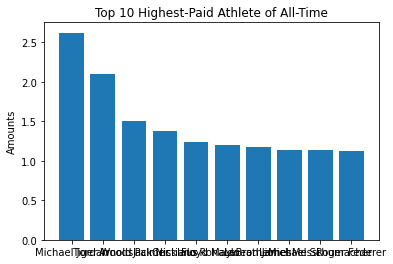

In [13]:
x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.ylabel('Amounts')
plt.title('Top 10 Highest-Paid Athlete of All-Time')
plt.bar(x, y)
ax = plt.gca()
plt.show()

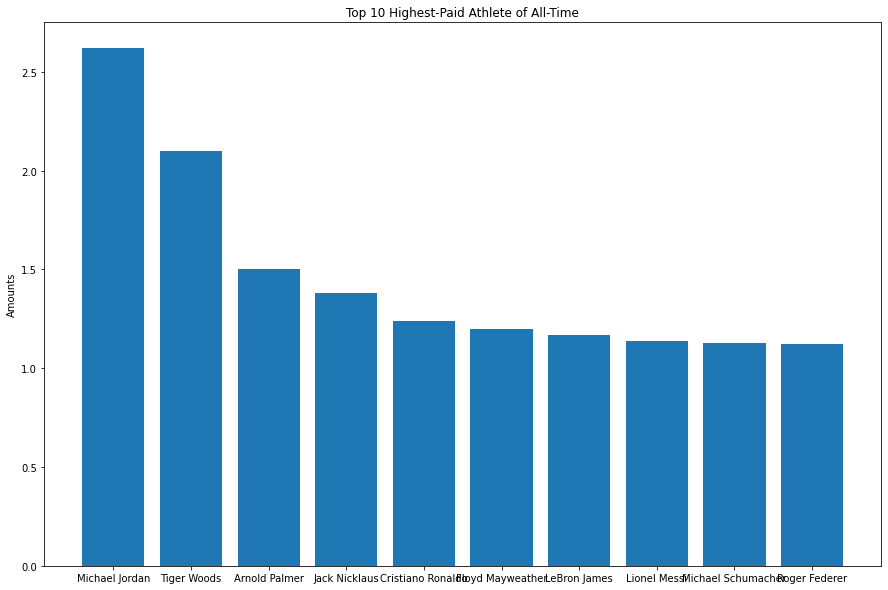

In [14]:
x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.figure(figsize=(15, 10))            # increasse the size of graph
plt.ylabel('Amounts')
plt.title('Top 10 Highest-Paid Athlete of All-Time')
plt.bar(x, y)
ax = plt.gca()
plt.show()

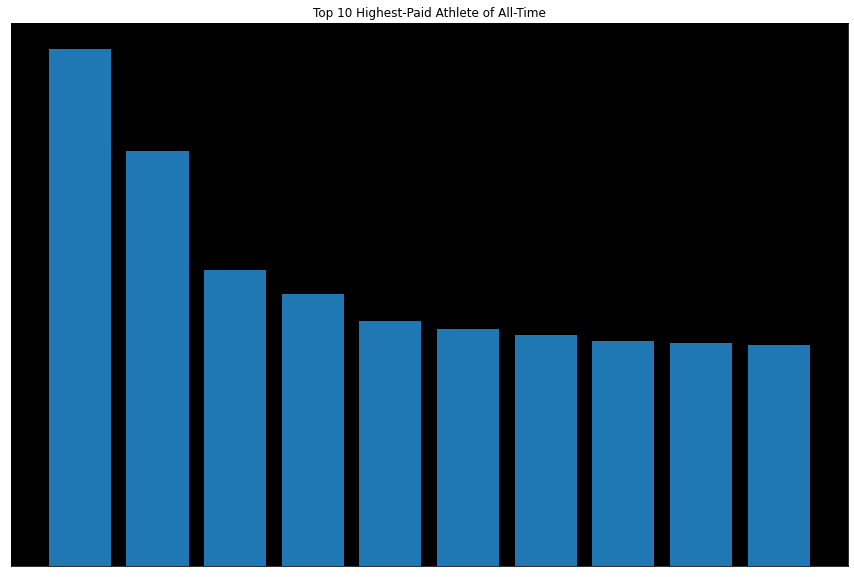

In [15]:
x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.figure(figsize=(15, 10))            # increasse the size of graph
plt.ylabel('Amounts')
plt.title('Top 10 Highest-Paid Athlete of All-Time')
plt.bar(x, y)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)       # hide Athlete names
ax.axes.yaxis.set_visible(False)      # hide amounts in y axis
ax.set_facecolor('black')             # set background color to black
plt.show()

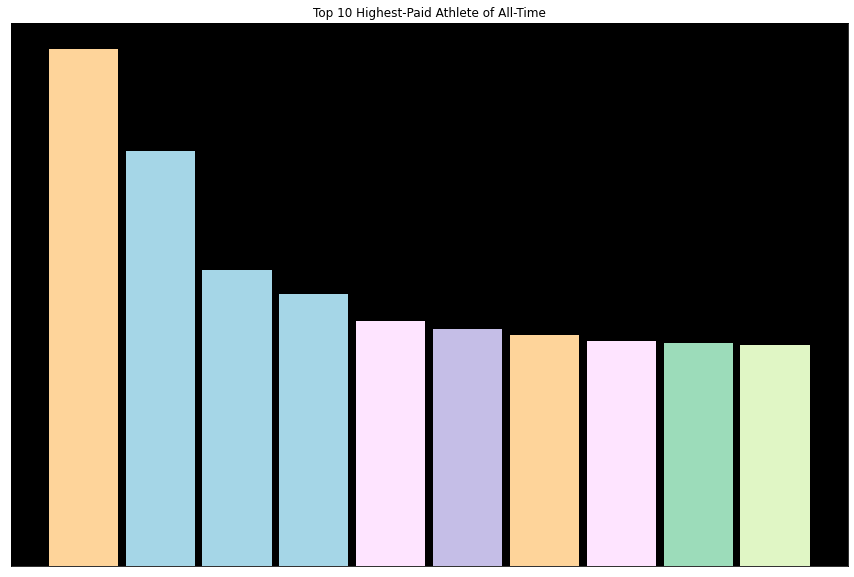

In [16]:
x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.figure(figsize=(15, 10))            # increasse the size of graph
plt.ylabel('Amounts')
plt.title('Top 10 Highest-Paid Athlete of All-Time')
plt.bar(x, y, width=0.9, color=['#fed49a', '#a5d6e7', '#a5d6e7', '#a5d6e7', '#fee4ff', '#c5bee7',     # change width of bars and add colors to each bars
               '#fed49a', '#fee4ff', '#9cdcba', '#e0f6c5'])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)       # hide Athlete names
ax.axes.yaxis.set_visible(False)      # hide amounts in y axis
ax.set_facecolor('black')             # set background color to black
plt.show()

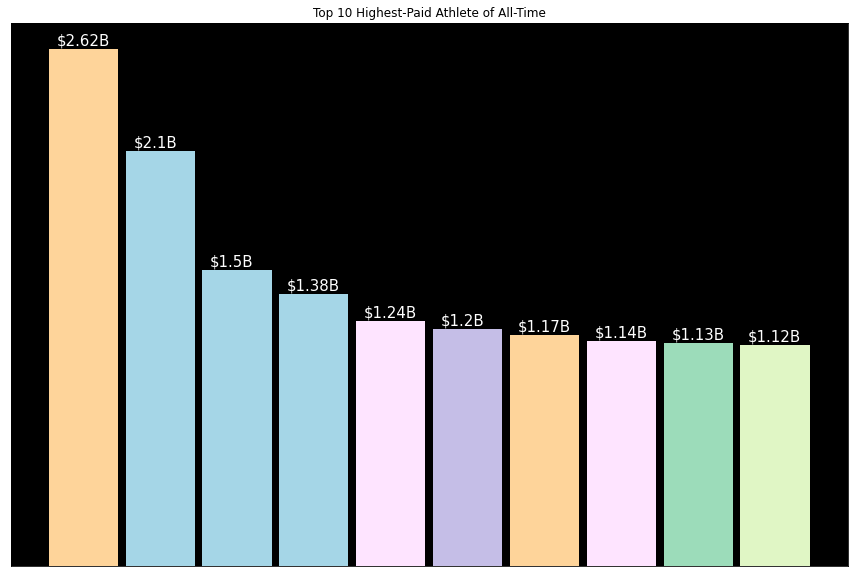

In [17]:
x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.figure(figsize=(15, 10))                            # increasse the size of graph
plt.ylabel('Amounts')
plt.title('Top 10 Highest-Paid Athlete of All-Time')
plt.bar(x, y, width=0.9, color=
['#fed49a', '#a5d6e7', '#a5d6e7'
, '#a5d6e7', '#fee4ff', '#c5bee7',                      # change width of bars and add colors to each bars
'#fed49a', '#fee4ff', '#9cdcba', '#e0f6c5'])

# add the amount in the top of bars
for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.02, "$" + str(value) + "B", color='white', size = '10', fontsize = '15')


ax = plt.gca()
ax.axes.xaxis.set_visible(False)                        # hide Athlete names
ax.axes.yaxis.set_visible(False)                        # hide amounts in y axis
ax.set_facecolor('black')                               # set background color to black
plt.show()

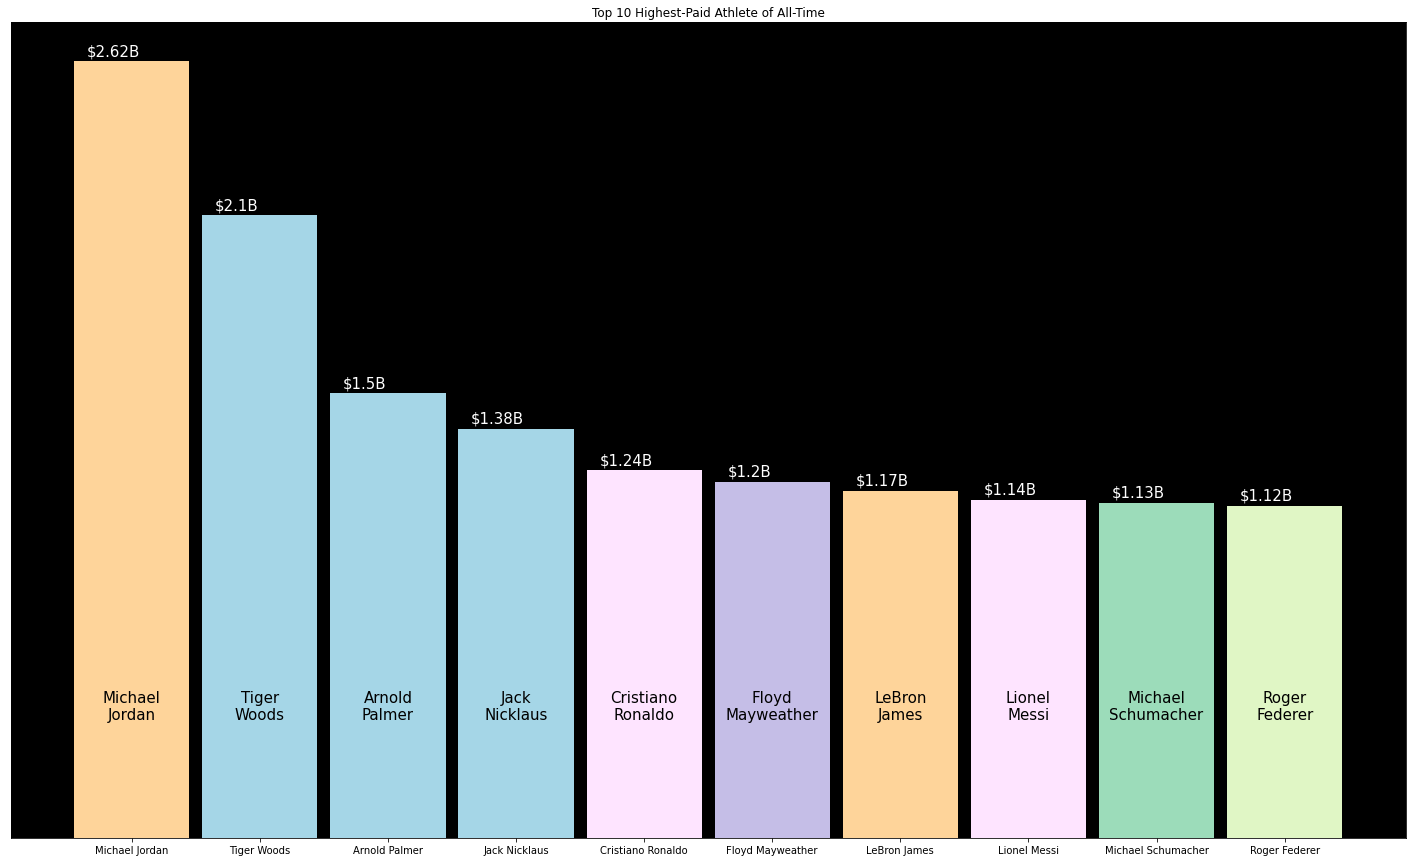

In [18]:
x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.figure(figsize=(25, 15))
plt.ylabel('Amounts')
plt.title('Top 10 Highest-Paid Athlete of All-Time')
plt.bar(x, y, width=0.9, color=['#fed49a', '#a5d6e7', '#a5d6e7', '#a5d6e7', '#fee4ff', '#c5bee7', 
               '#fed49a', '#fee4ff', '#9cdcba', '#e0f6c5'])
ax = plt.gca()
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(False)
ax.set_facecolor('black')
for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.02, "$" + str(value) + "B", color='white', size = '10', fontsize = '15')

# trying to add names inside the bars
i = 0
for x in df['Athlete']:
  i = i + 1
  name = x.split(" ")
  plt.text(i-1,0.4,name[0] + "\n" + name[1] ,ha='center',fontsize=15 , color='black')

plt.show()

In [19]:
# add images to bars
# https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

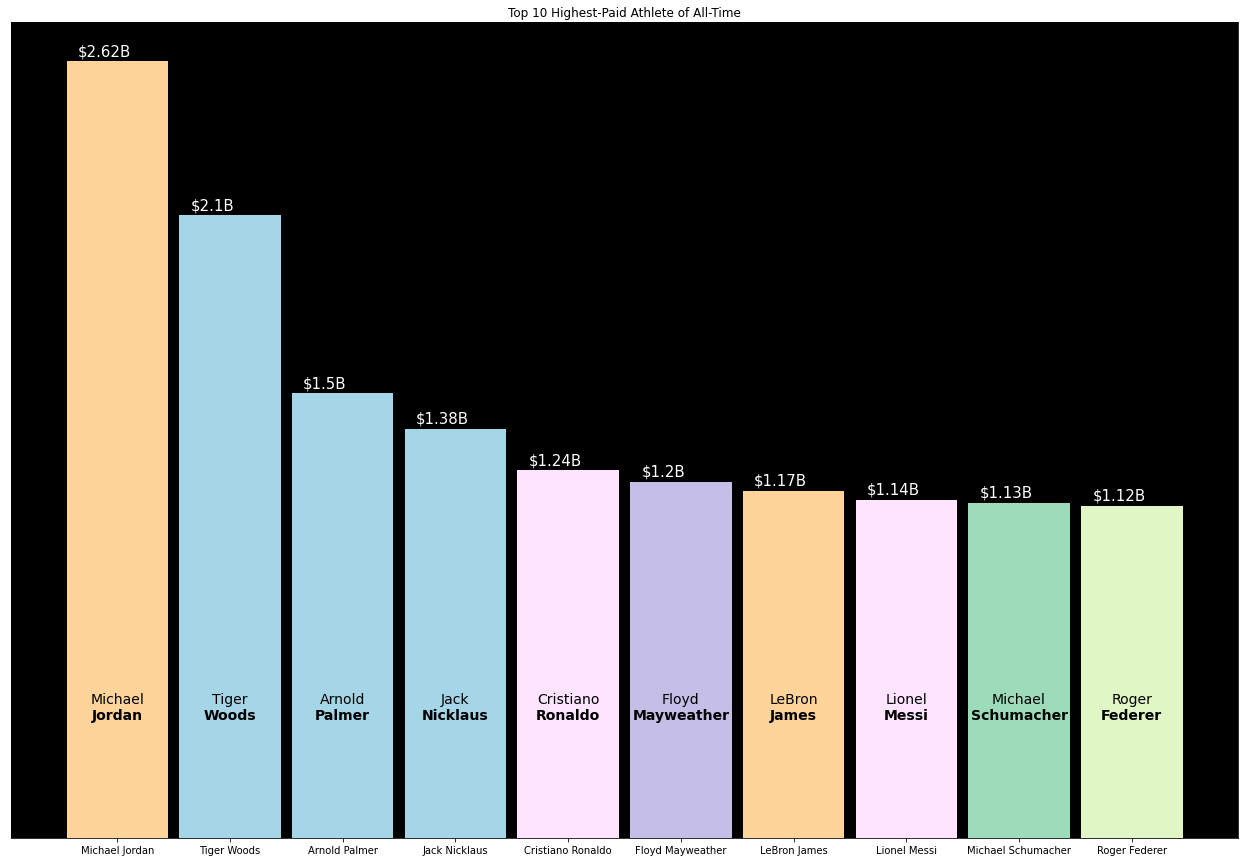

In [20]:
x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.figure(figsize=(22, 15))
plt.ylabel('Amounts')
plt.title('Top 10 Highest-Paid Athlete of All-Time')
plt.bar(x, y, width=0.9, color=['#fed49a', '#a5d6e7', '#a5d6e7', '#a5d6e7', '#fee4ff', '#c5bee7', 
               '#fed49a', '#fee4ff', '#9cdcba', '#e0f6c5'])
ax = plt.gca()
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(False)
ax.set_facecolor('black')
for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.02, "$" + str(value) + "B", color='white', size = '10', fontsize = '15')

# trying to add names inside the bars
i = 0
for x in df['Athlete']:
  i = i + 1
  name = x.split(" ")
  plt.text(i-1,0.4,name[0] + "\n" ,ha='center',fontsize=14 , color='black')          # prints first name with regular text
  plt.text(i-1,0.4,name[1] ,ha='center',fontsize=14 , color='black', fontweight = 'bold')   # prints last name with bold text


plt.show()

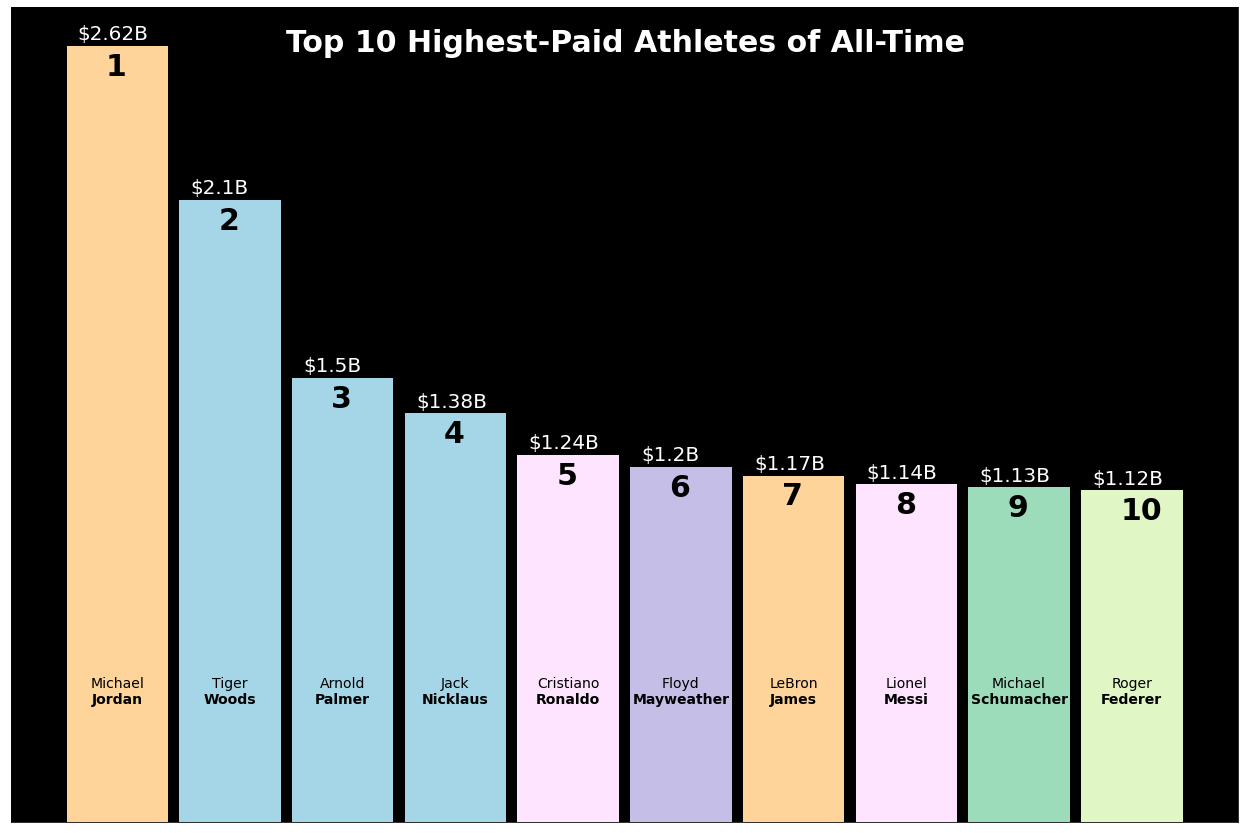

In [21]:
x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.figure(figsize=(22, 15))
plt.ylabel('Amounts')
plt.bar(x, y, width=0.9, color=['#fed49a', '#a5d6e7', '#a5d6e7', '#a5d6e7', '#fee4ff', '#c5bee7', 
               '#fed49a', '#fee4ff', '#9cdcba', '#e0f6c5'])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_facecolor('black')

# for-loop to display Athletes Pay at top of bars
for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.02, "$" + str(value) + "B", color='white', size = '10', fontsize = '20')

# for-loop to display rank numbers under each bar
for index, value in enumerate(y):
    plt.text(index - 0.1, value - 0.1, index+1 , color='black', size = '10', fontsize = '30', fontweight = 'bold')

i = 0 # initialize value of i to use in a for-loop
for x in df['Athlete']:
  i = i + 1
  name = x.split(" ")
  plt.text(i-1,0.4,name[0] + "\n" ,ha='center',fontsize=14 , color='black')          # prints first name with regular text
  plt.text(i-1,0.4,name[1] ,ha='center',fontsize=14 , color='black', fontweight = 'bold')   # prints last name with bold text

plt.text(1.5,2.6,"Top 10 Highest-Paid Athletes of All-Time",fontsize=30, color='white',  fontweight = 'bold')

plt.show()

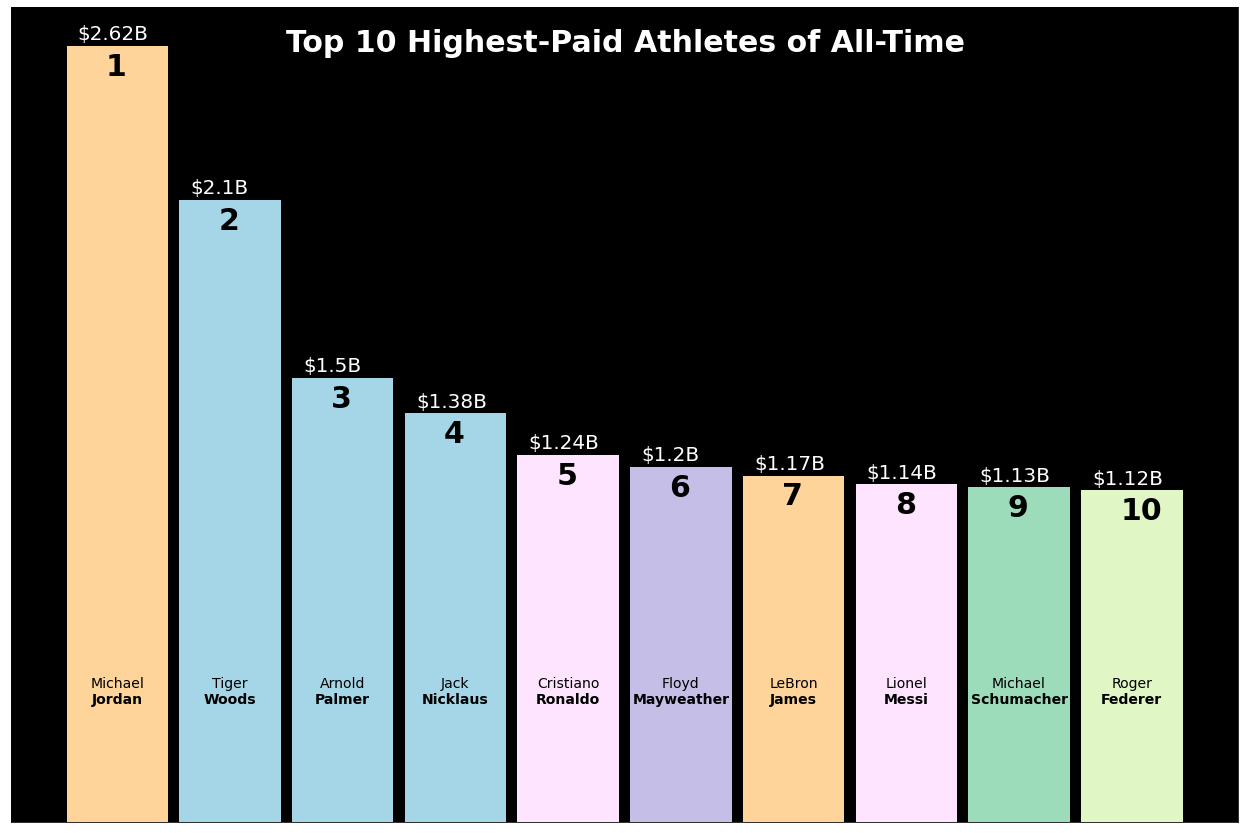

In [27]:

x = df['Athlete']
y = df['Inflation Adjusted Earnings']
plt.figure(figsize=(22, 15))
plt.ylabel('Amounts')
plt.bar(x, y, width=0.9, color=['#fed49a', '#a5d6e7', '#a5d6e7', '#a5d6e7', '#fee4ff', '#c5bee7', 
               '#fed49a', '#fee4ff', '#9cdcba', '#e0f6c5'])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_facecolor('black')

# for-loop to display Athletes Pay at top of bars
for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.02, "$" + str(value) + "B", color='white', size = '10', fontsize = '20')

# for-loop to display rank numbers under each bar
for index, value in enumerate(y):
    plt.text(index - 0.1, value - 0.1, index+1 , color='black', size = '10', fontsize = '30', fontweight = 'bold')

i = 0 # initialize value of i to use in a for-loop
for x in df['Athlete']:
  i = i + 1
  name = x.split(" ")
  plt.text(i-1,0.4,name[0] + "\n" ,ha='center',fontsize=14 , color='black')          # prints first name with regular text
  plt.text(i-1,0.4,name[1] ,ha='center',fontsize=14 , color='black', fontweight = 'bold')   # prints last name with bold text

plt.text(1.5,2.6,"Top 10 Highest-Paid Athletes of All-Time",fontsize=30, color='white',  fontweight = 'bold')

plt.draw()
plt.show()


In [43]:
https://stackoverflow.com/questions/44246650/add-image-annotations-to-bar-plots

SyntaxError: ignored